In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [6]:
model = tf.keras.models.load_model('model_updated_p.h5')

In [4]:
class_labels  ={'LeafBlight': 0, 'LeafGall': 1, 'Magnesium': 2, 'Potassium': 3, 'healthy': 4}

In [5]:
class_labels = {v: k for k, v in class_labels.items()}
class_labels

{0: 'LeafBlight', 1: 'LeafGall', 2: 'Magnesium', 3: 'Potassium', 4: 'healthy'}

In [7]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224)) 
    img_array = image.img_to_array(img)  
    img_array = np.expand_dims(img_array, axis=0)  
    img_array = img_array / 255.0  
    return img_array

In [8]:
def predict_image(img_path):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class_idx = np.argmax(predictions, axis=1) 
    predicted_class_label = class_labels[predicted_class_idx[0]]

    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off') 
    plt.title(f'Predicted Class: {predicted_class_label}')  
    plt.show()
    
    return predicted_class_label, predictions[0].max()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


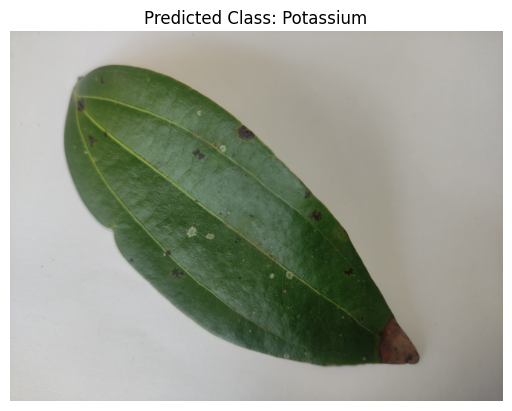

Predicted Class: Potassium
Prediction Probabilities: 0.4611279368400574


In [18]:
img_path = 'raw_data\\test\\Potassium\\IMG_20250728_121340.jpg'
predicted_class, predictions = predict_image(img_path)
print(f'Predicted Class: {predicted_class}')
print(f'Prediction Probabilities: {predictions}')